## Environment Set-up

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA PROCESS

In [389]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [390]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Location', 'Subscription_Start_Date',
       'Subscription_Type', 'Monthly_Payment', 'Payment_Method',
       'Monthly_Hours_Watched', 'Favorite_Genre', 'Devices_Used',
       'Average_Session_Length', 'Content_ID', 'Rating_Given', 'Churned',
       'Date_of_Churn', 'Reason_for_Churn'],
      dtype='object')

In [391]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [393]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [394]:
# Count the number of users for each unique value in the 'Devices_Used' column
device_counts = df['Devices_Used'].value_counts()

# Display the counts
print(device_counts)

Devices_Used
Mobile    408
Tablet    217
TV        201
PC        174
Name: count, dtype: int64


In [454]:
reason_for_churn_counts = df['Reason_for_Churn'].value_counts()

In [458]:
# Display the DataFrame
reason_for_churn_df

,Reason_for_Churn,Count
0,Price increase,68
1,Found better service,64
2,Personal reasons,62
3,Dissatisfied with content,52


### Convert Subscription_Start_Date and Date_of_Churn to datetime and calculate total revenue

In [395]:
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'])

In [396]:
# Calculate the duration between subscription start date and date of churn in days
df['Subscription_Duration_Days'] = (df['Date_of_Churn'] - df['Subscription_Start_Date']).dt.days


In [397]:
# Convert the duration from days to months
df['Subscription_Duration_Months'] = df['Subscription_Duration_Days'] / 30.44

In [398]:
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'])

In [399]:
# Get the current date
current_date = pd.to_datetime('today')

In [400]:
# Calculate the duration between subscription start date and date of churn/current date in days
df['Subscription_Duration_Days'] = (df['Date_of_Churn'].fillna(current_date) - df['Subscription_Start_Date']).dt.days

In [401]:
# Convert the duration from days to months
df['Subscription_Duration_Months'] = df['Subscription_Duration_Days'] / 30.44

In [402]:
# Calculate the total revenue
df['Total_Revenue'] = df['Subscription_Duration_Months'] * df['Monthly_Payment']

In [403]:
# Calculate the total revenue for all users combined
total_revenue = df['Total_Revenue'].sum()

In [404]:
# Optional: Display the resulting dataframe for verification
df[['User_ID', 'Subscription_Start_Date', 'Date_of_Churn', 'Subscription_Duration_Months', 'Monthly_Payment', 'Total_Revenue']]

,User_ID,Subscription_Start_Date,Date_of_Churn,Subscription_Duration_Months,Monthly_Payment,Total_Revenue
0,1,2020-06-07 01:53:37.656934,NaT,47.667543,19.99,952.874179
1,2,2024-02-21 01:53:37.656980,NaT,3.186597,14.99,47.767083
2,3,2022-10-06 01:53:37.656995,NaT,19.710907,14.99,295.466491
3,4,2022-01-04 01:53:37.657006,NaT,28.745072,14.99,430.888633
4,5,2020-03-13 01:53:37.657017,NaT,50.492773,14.99,756.886662
...,...,...,...,...,...,...
995,996,2020-10-26 01:53:37.667884,2021-03-14 01:53:37.667884,4.566360,9.99,45.617937
996,997,2020-05-06 01:53:37.667895,NaT,48.718791,14.99,730.294678
997,998,2019-06-19 01:53:37.667906,NaT,59.296978,14.99,888.861695
998,999,2020-11-13 01:53:37.667917,2021-04-05 01:53:37.667917,4.697766,14.99,70.419514


In [405]:
# Display the total revenue
f'The total revenue for all users is: ${total_revenue:,.2f}'

'The total revenue for all users is: $372,635.75'

## DATA CLEANING

### Find Outliers

In [406]:
df.isnull().sum()

User_ID                           0
Age                               0
Gender                            0
Location                          0
Subscription_Start_Date           0
Subscription_Type                 0
Monthly_Payment                   0
Payment_Method                    0
Monthly_Hours_Watched             0
Favorite_Genre                    0
Devices_Used                      0
Average_Session_Length            0
Content_ID                        0
Rating_Given                      0
Churned                           0
Date_of_Churn                   754
Reason_for_Churn                754
Subscription_Duration_Days        0
Subscription_Duration_Months      0
Total_Revenue                     0
dtype: int64

In [407]:
numerical_features = df.select_dtypes(include=[np.number]).columns

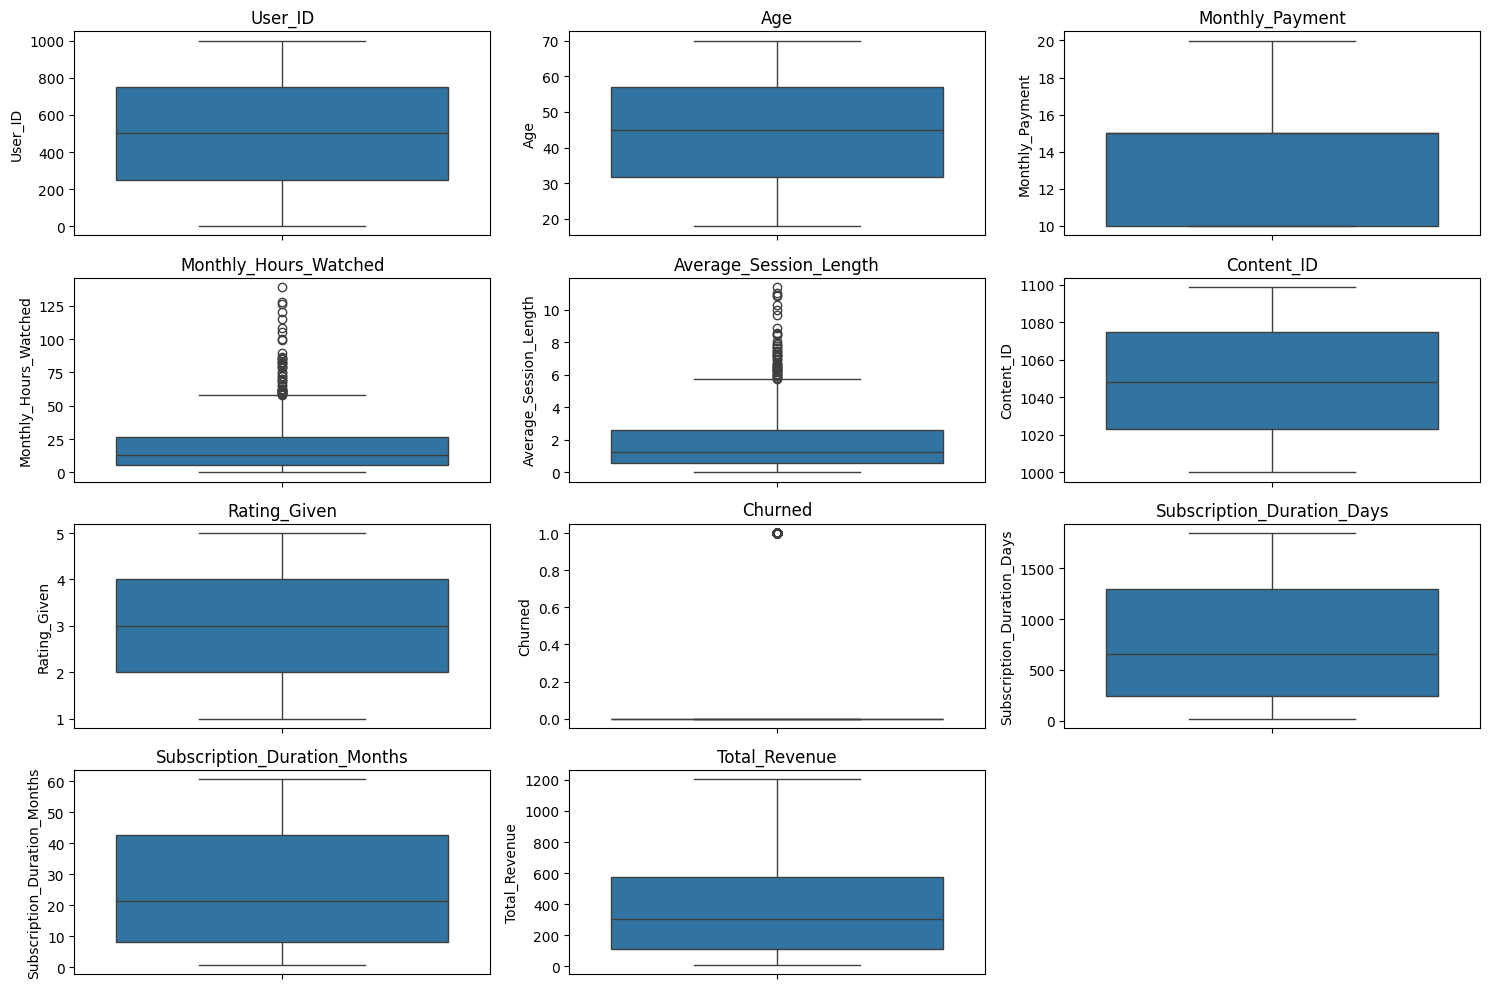

In [408]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i+1)
    sns.boxplot(df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [409]:
def detect_outliers(data):
    outliers = {}
    for feature in numerical_features:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature].count()
    return outliers

outliers = detect_outliers(df)
outliers

{'User_ID': 0,
 'Age': 0,
 'Monthly_Payment': 0,
 'Monthly_Hours_Watched': 45,
 'Average_Session_Length': 49,
 'Content_ID': 0,
 'Rating_Given': 0,
 'Churned': 246,
 'Subscription_Duration_Days': 0,
 'Subscription_Duration_Months': 0,
 'Total_Revenue': 0}

### Display Outliers by using median imputation method

In [410]:
def display_outliers_with_bounds(data):
    outliers_list = []
    bounds = {}
    for feature in ['Monthly_Hours_Watched', 'Average_Session_Length']:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds[feature] = {'Lower Bound': lower_bound, 'Upper Bound': upper_bound}
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outliers_list.append(outliers)
    outliers_data = pd.concat(outliers_list).drop_duplicates()
    return outliers_data, bounds

outliers_data, bounds = display_outliers_with_bounds(df)
print(outliers_data)
print("\nBounds for identifying outliers:")
for feature, bound in bounds.items():
    print(f"{feature}: {bound}")


     User_ID  Age  Gender Location    Subscription_Start_Date  \
3          4   32  Female     East 2022-01-04 01:53:37.657006   
6          7   38  Female  Central 2021-02-06 01:53:37.657039   
37        38   32  Female    South 2019-08-29 01:53:37.657381   
108      109   26  Female     East 2022-05-11 01:53:37.658194   
136      137   52    Male  Central 2023-10-18 01:53:37.658494   
..       ...  ...     ...      ...                        ...   
876      877   51  Female    South 2022-05-02 01:53:37.666616   
972      973   22  Female  Central 2020-02-22 01:53:37.667620   
975      976   43    Male    North 2023-11-18 01:53:37.667657   
976      977   63  Female  Central 2019-07-21 01:53:37.667668   
980      981   43   Other  Central 2023-06-20 01:53:37.667714   

    Subscription_Type  Monthly_Payment Payment_Method  Monthly_Hours_Watched  \
3            Standard            14.99    Credit Card              60.244820   
6               Basic             9.99   Direct Debit      

#### Outliers replaced by median.

In [411]:
def replace_outliers_with_median(data):
    for feature in ['Monthly_Hours_Watched', 'Average_Session_Length']:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = data[feature].median()
        data.loc[(data[feature] < lower_bound) | (data[feature] > upper_bound), feature] = median_value
    return data

df_median_replaced = replace_outliers_with_median(df)


In [412]:
# Outliers replaced by 99th percentile 
def cap_outliers_at_percentile(data, percentile=99):
    for feature in ['Monthly_Hours_Watched', 'Average_Session_Length']:
        upper_bound = np.percentile(data[feature], percentile)
        data.loc[data[feature] > upper_bound, feature] = upper_bound
    return data

df_capped = cap_outliers_at_percentile(df)


### Data after Outliers Replaced

In [447]:
def plot_feature_distributions(data_original, data_median, data_capped, feature):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    sns.histplot(data_original[feature], kde=True, bins=30)
    plt.title(f'Original {feature} Distribution')

    plt.subplot(1, 3, 2)
    sns.histplot(data_median[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution (Median Replaced)')

    plt.tight_layout()
    plt.show()

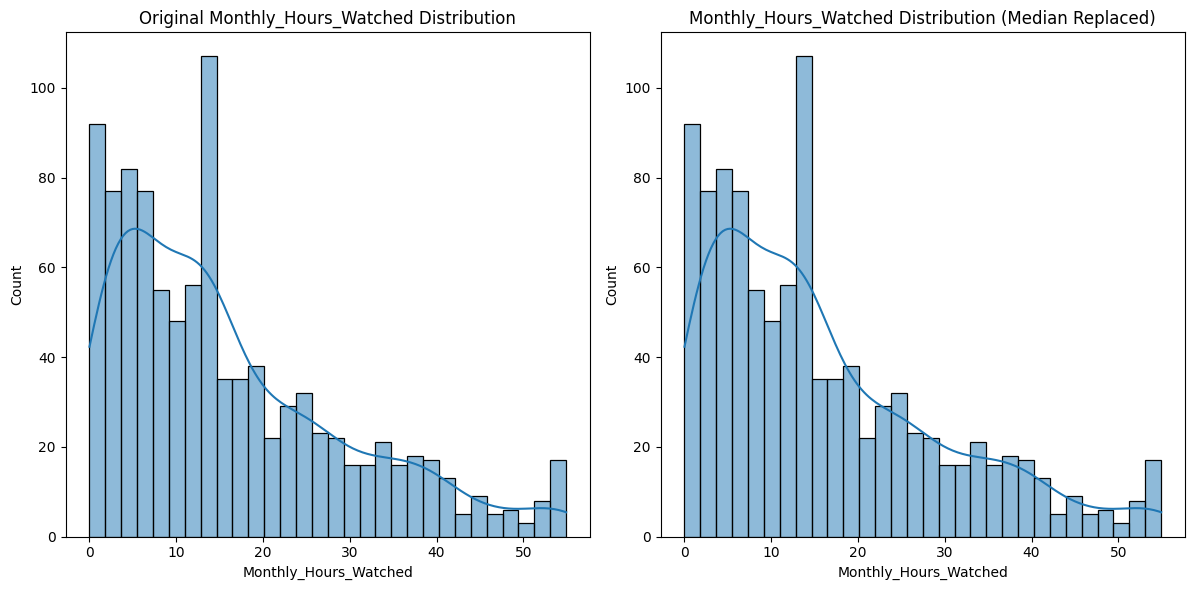

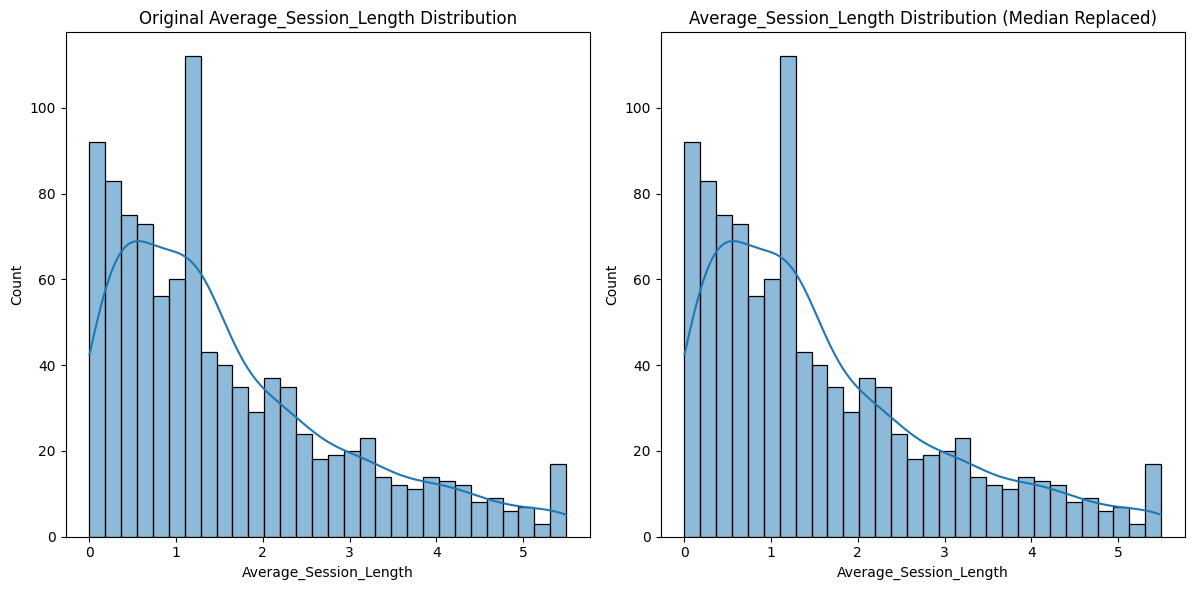

In [452]:
# Plot distributions for 'Monthly_Hours_Watched'
plot_feature_distributions(df, df_median_replaced, df_capped, 'Monthly_Hours_Watched')
# Plot distributions for 'Average_Session_Length'
plot_feature_distributions(df, df_median_replaced, df_capped, 'Average_Session_Length')

### Find Relationship between Average_Session_Length across Favorite_Genre

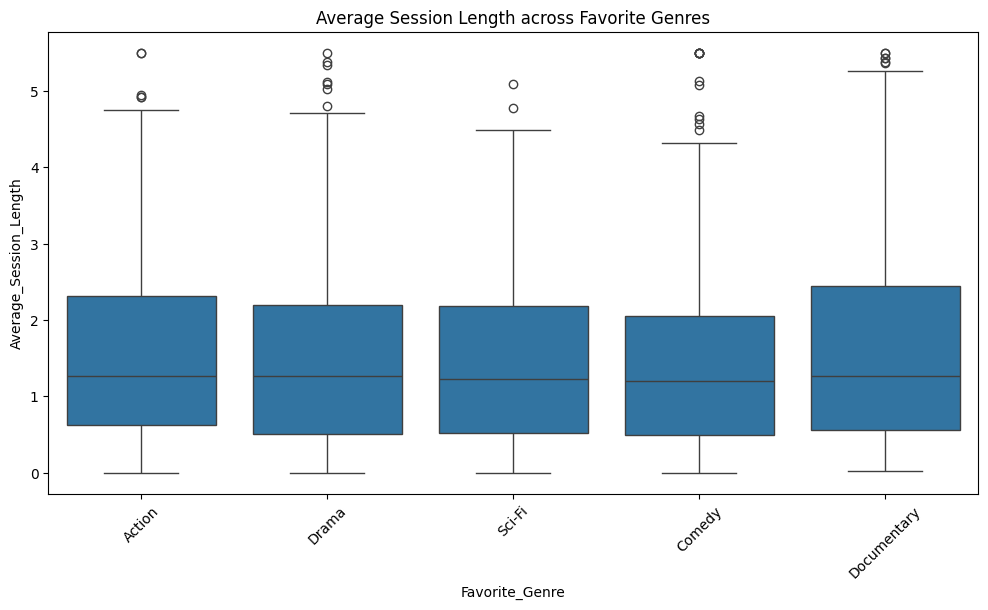

In [415]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Favorite_Genre', y='Average_Session_Length', data=df)
plt.title('Average Session Length across Favorite Genres')
plt.xticks(rotation=45)
plt.show()

### Perform ANOVA test

In [416]:
# Perform ANOVA test
genres = df['Favorite_Genre'].unique()
session_lengths = [df[df['Favorite_Genre'] == genre]['Average_Session_Length'] for genre in genres]

anova_result = stats.f_oneway(*session_lengths)
f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}'


'ANOVA F-statistic: 0.8622072511201928, p-value: 0.48608682675886916'

#### p-value = 0.628 which is greater than 0.05, means that there is not a significant stastical relationship between Favourite_Genre and Average_Session_Length

In [417]:
# Calculate the average session length for each genre
genre_session_length = df.groupby('Favorite_Genre')['Average_Session_Length'].mean().reset_index()

# Display the results
genre_session_length


,Favorite_Genre,Average_Session_Length
0,Action,1.615445
1,Comedy,1.519317
2,Documentary,1.712659
3,Drama,1.615571
4,Sci-Fi,1.487262


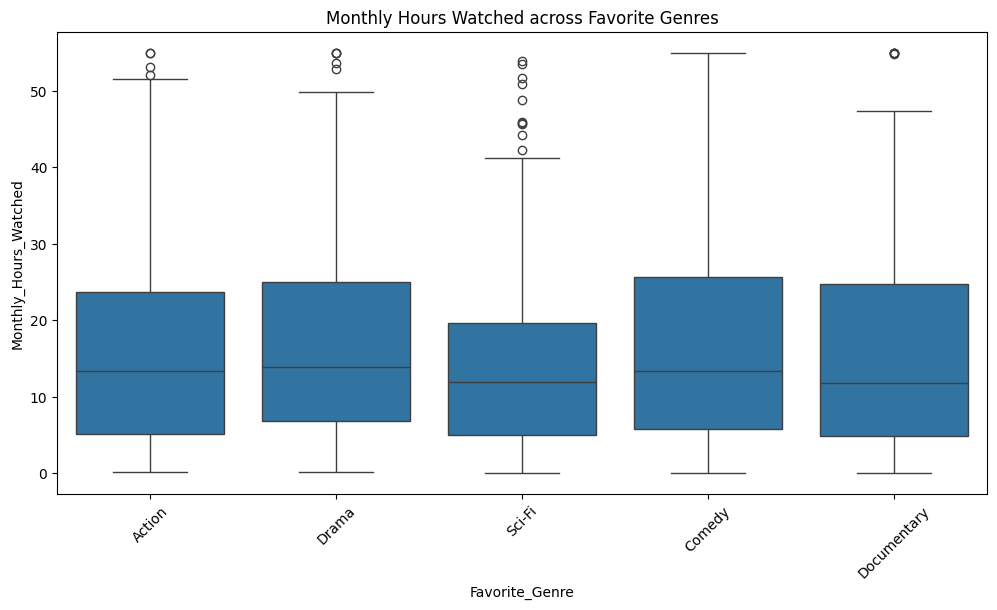

In [418]:
# Create a box plot for Average_Session_Length across Favorite_Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Favorite_Genre', y='Monthly_Hours_Watched', data=df)
plt.title('Monthly Hours Watched across Favorite Genres')
plt.xticks(rotation=45)
plt.show()

In [419]:
import scipy.stats as stats

# Perform ANOVA test
genres = df['Favorite_Genre'].unique()
session_lengths = [df[df['Favorite_Genre'] == genre]['Monthly_Hours_Watched'] for genre in genres]

anova_result = stats.f_oneway(*session_lengths)
f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}'

'ANOVA F-statistic: 1.6494012636846411, p-value: 0.15967018350765522'

In [420]:
# Calculate the monthly hours watched for each genre
genre_session_length = df.groupby('Favorite_Genre')['Monthly_Hours_Watched'].mean().reset_index()

# Display the results
genre_session_length


,Favorite_Genre,Monthly_Hours_Watched
0,Action,16.075487
1,Comedy,17.041409
2,Documentary,15.527808
3,Drama,17.269944
4,Sci-Fi,14.272355


In [421]:
# Count the frequency of each device
device_counts = df['Devices_Used'].value_counts()

# Display the results
device_counts


Devices_Used
Mobile    408
Tablet    217
TV        201
PC        174
Name: count, dtype: int64

/var/folders/pc/8bwtdgcn6797gk_s0_dg_qk80000gn/T/ipykernel_97605/1488164646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis')


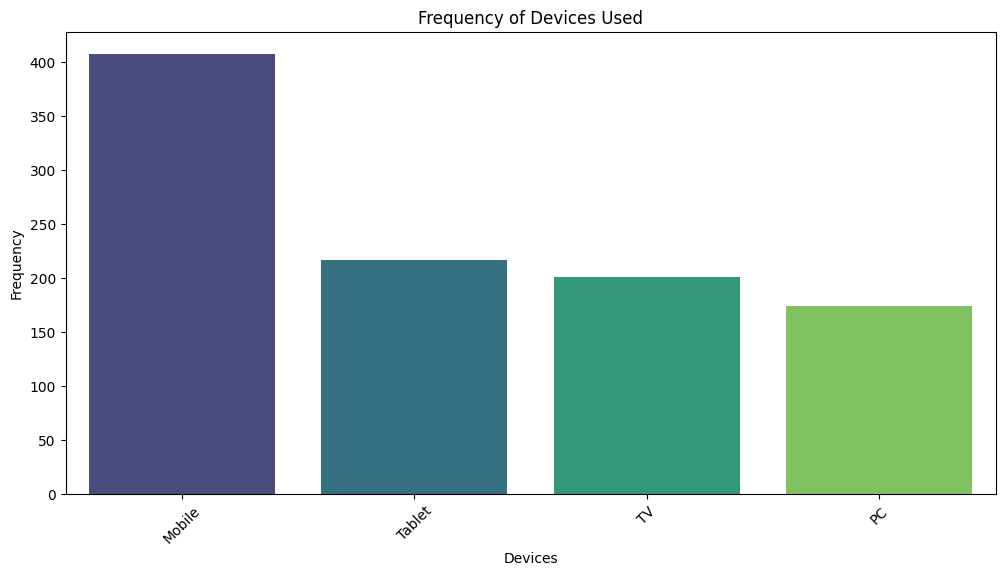

In [422]:
# Create a bar plot for the frequency of each device
plt.figure(figsize=(12, 6))
sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis')
plt.title('Frequency of Devices Used')
plt.xlabel('Devices')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [423]:
# Count the frequency of each favorite genre
genre_counts = df['Favorite_Genre'].value_counts()

# Display the results
genre_counts


Favorite_Genre
Drama          212
Action         205
Comedy         203
Sci-Fi         192
Documentary    188
Name: count, dtype: int64

/var/folders/pc/8bwtdgcn6797gk_s0_dg_qk80000gn/T/ipykernel_97605/2034761973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


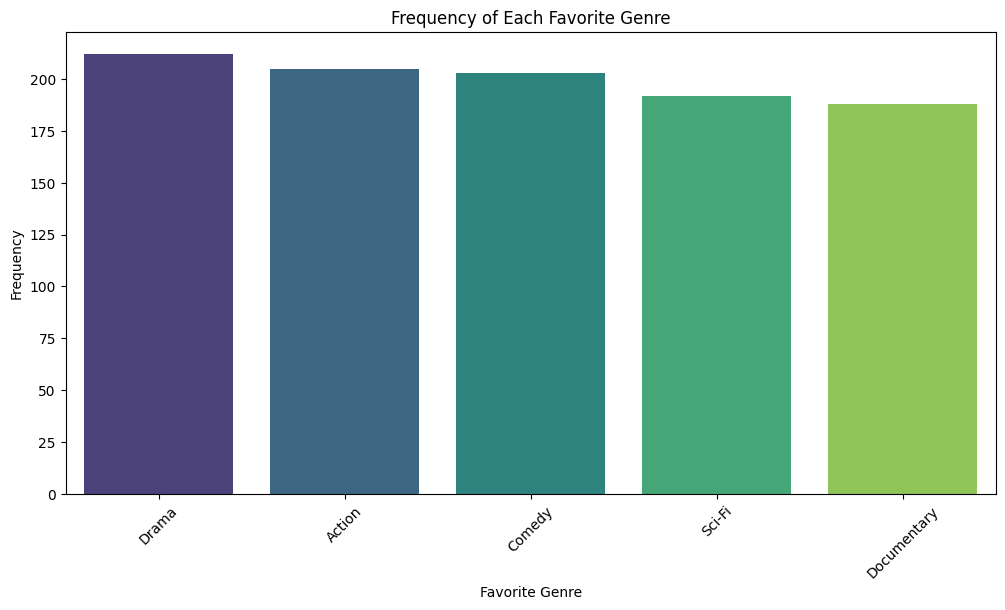

In [424]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the frequency of each favorite genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Frequency of Each Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [425]:
# Print the most favorite genre and its count
f'The most favorite genre is: {most_favorite_genre} with {most_favorite_genre_count} users.'

'The most favorite genre is: Drama with 212 users.'

In [426]:
# Create a contingency table
device_genre_crosstab = pd.crosstab(df['Devices_Used'], df['Favorite_Genre'])

# Display the contingency table
device_genre_crosstab

Favorite_Genre,Action,Comedy,Documentary,Drama,Sci-Fi
Devices_Used,,,,,
Mobile,81,90,77,82,78
PC,43,29,24,43,35
TV,45,46,39,33,38
Tablet,36,38,48,54,41


In [427]:
# Create a contingency table and normalize it to percentages
device_genre_crosstab_percentage = pd.crosstab(df['Devices_Used'], df['Favorite_Genre'], normalize='index') * 100

# Display the contingency table with percentages
device_genre_crosstab_percentage


Favorite_Genre,Action,Comedy,Documentary,Drama,Sci-Fi
Devices_Used,,,,,
Mobile,19.852941,22.058824,18.872549,20.098039,19.117647
PC,24.712644,16.666667,13.793103,24.712644,20.114943
TV,22.388060,22.885572,19.402985,16.417910,18.905473
Tablet,16.589862,17.511521,22.119816,24.884793,18.894009


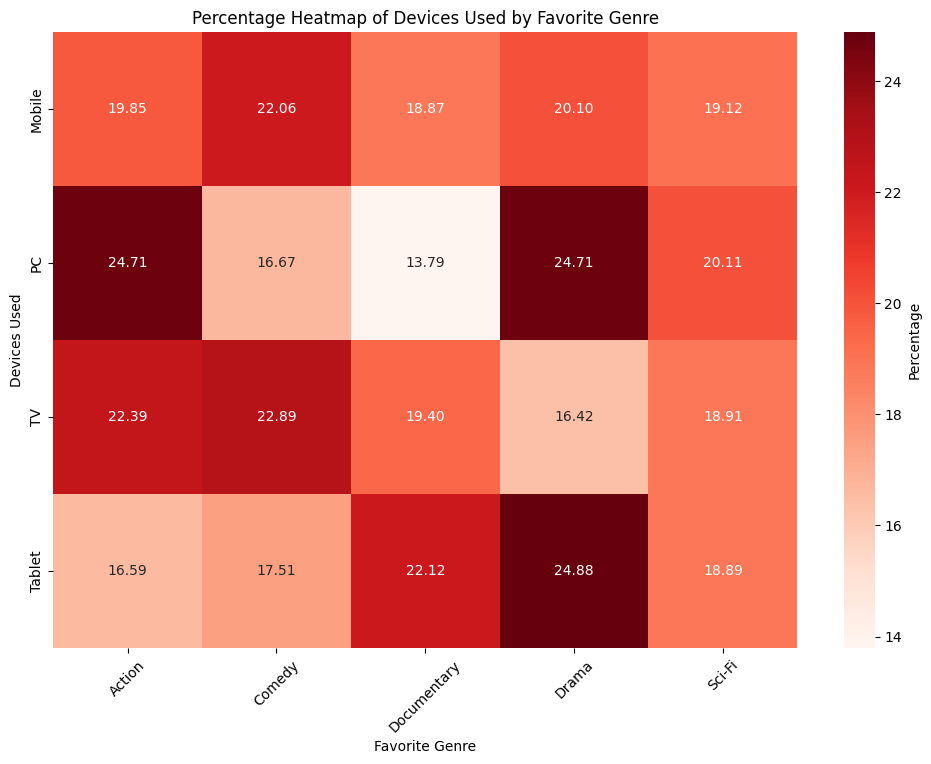

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the relationship between devices used and favorite genres in percentages
plt.figure(figsize=(12, 8))
sns.heatmap(device_genre_crosstab_percentage, annot=True, fmt='.2f', cmap='Reds', cbar_kws={'label': 'Percentage'})
plt.title('Percentage Heatmap of Devices Used by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Devices Used')
plt.xticks(rotation=45)
plt.show()


## FIND RELATIONSHIP BETWEEN AGE AND FAVORITE_GENRE

### Calculate the average age for each genre

In [429]:
# Calculate the average age for each genre
genre_age_stats = df.groupby('Favorite_Genre')['Age'].mean().reset_index()

# Display the results
genre_age_stats


,Favorite_Genre,Age
0,Action,45.209756
1,Comedy,44.236453
2,Documentary,44.223404
3,Drama,43.816038
4,Sci-Fi,44.447917


In [430]:
genre_age_stats.set_index('Favorite_Genre', inplace=True)

In [431]:
genre_age_stats_heatmap = genre_age_stats.T

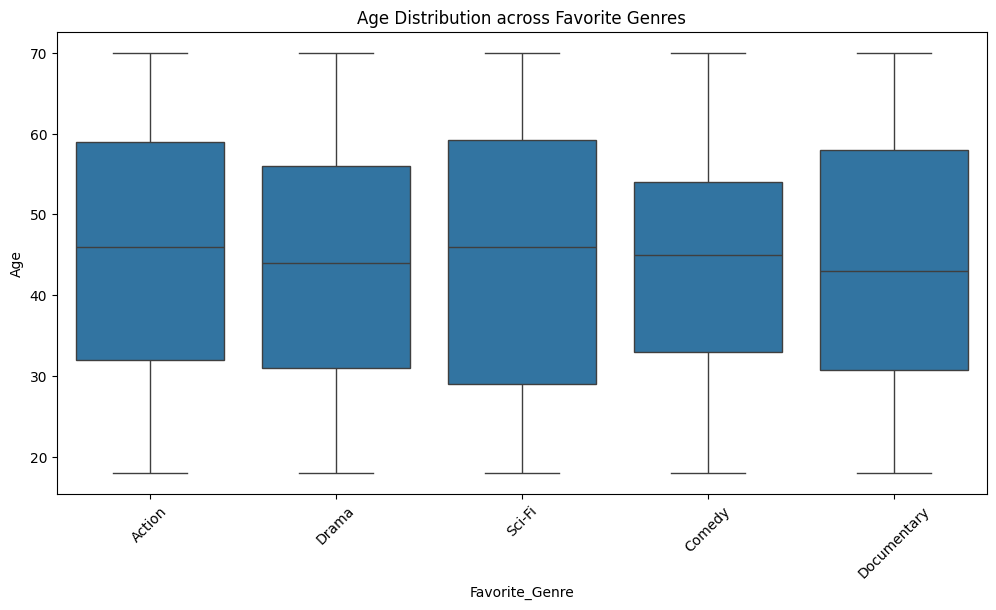

In [432]:
# Create a box plot for Age across Favorite_Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Favorite_Genre', y='Age', data=df)
plt.title('Age Distribution across Favorite Genres')
plt.xticks(rotation=45)
plt.show()

In [433]:
genres = df['Favorite_Genre'].unique()
ages = [df[df['Favorite_Genre'] == genre]['Age'] for genre in genres]

anova_result = stats.f_oneway(*ages)
f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}'

'ANOVA F-statistic: 0.23168051782074714, p-value: 0.9206234270595102'

##### p-value>= 0.05, which means there is not a significant relationship between age and favorite genres

## RELATIONSHIP BETWEEN LOCATION AND CHURNED 

In [434]:
location_churn_crosstab_percentage = location_churn_crosstab.div(location_churn_crosstab.sum(axis=1), axis=0) * 100

In [435]:
location_churn_crosstab_percentage

Churned,0,1
Location,,
Central,76.616915,23.383085
East,70.000000,30.000000
North,74.019608,25.980392
South,76.536313,23.463687
West,79.629630,20.370370


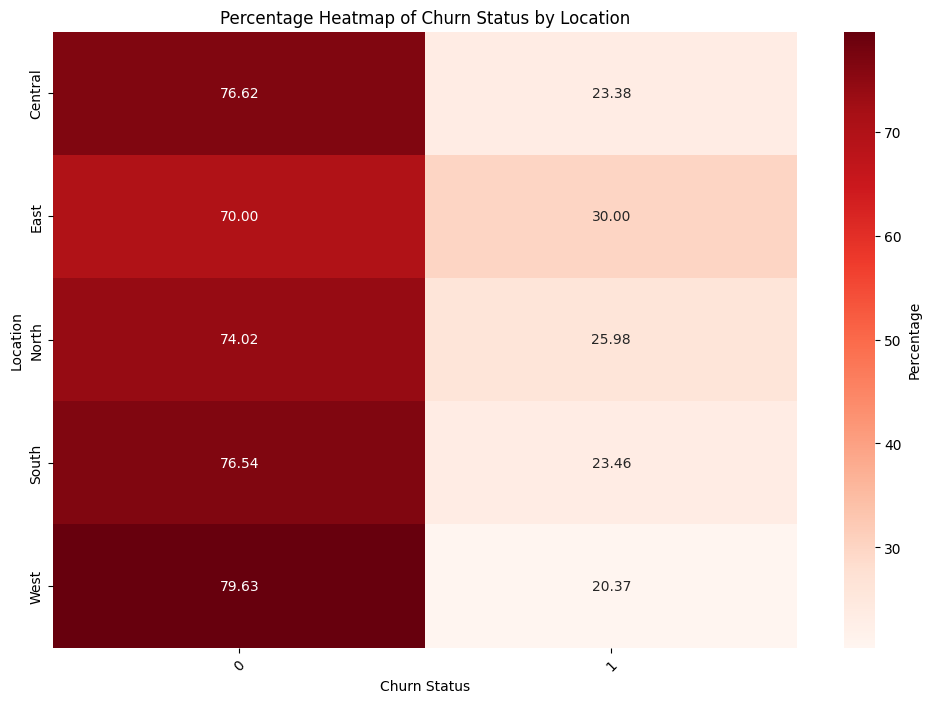

In [436]:
plt.figure(figsize=(12, 8))
sns.heatmap(location_churn_crosstab_percentage, annot=True, fmt='.2f', cmap='Reds', cbar_kws={'label': 'Percentage'})
plt.title('Percentage Heatmap of Churn Status by Location')
plt.xlabel('Churn Status')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.show()

##### For those location with a higher Churn Status, we can offer them discount on subcription to earn lotyalty

## RELATIONSHIP BETWEEN LOCATION AND FAVORITE_GENRES

In [437]:
location_genre_crosstab = pd.crosstab(df['Location'], df['Favorite_Genre'])


In [438]:
location_genre_crosstab

Favorite_Genre,Action,Comedy,Documentary,Drama,Sci-Fi
Location,,,,,
Central,40,51,31,46,33
East,41,36,44,47,32
North,46,38,44,35,41
South,37,37,30,33,42
West,41,41,39,51,44


In [439]:
location_genre_crosstab_percentage = location_genre_crosstab.div(location_genre_crosstab.sum(axis=1), axis=0) * 100


In [440]:
location_genre_crosstab_percentage

Favorite_Genre,Action,Comedy,Documentary,Drama,Sci-Fi
Location,,,,,
Central,19.900498,25.373134,15.422886,22.885572,16.417910
East,20.500000,18.000000,22.000000,23.500000,16.000000
North,22.549020,18.627451,21.568627,17.156863,20.098039
South,20.670391,20.670391,16.759777,18.435754,23.463687
West,18.981481,18.981481,18.055556,23.611111,20.370370


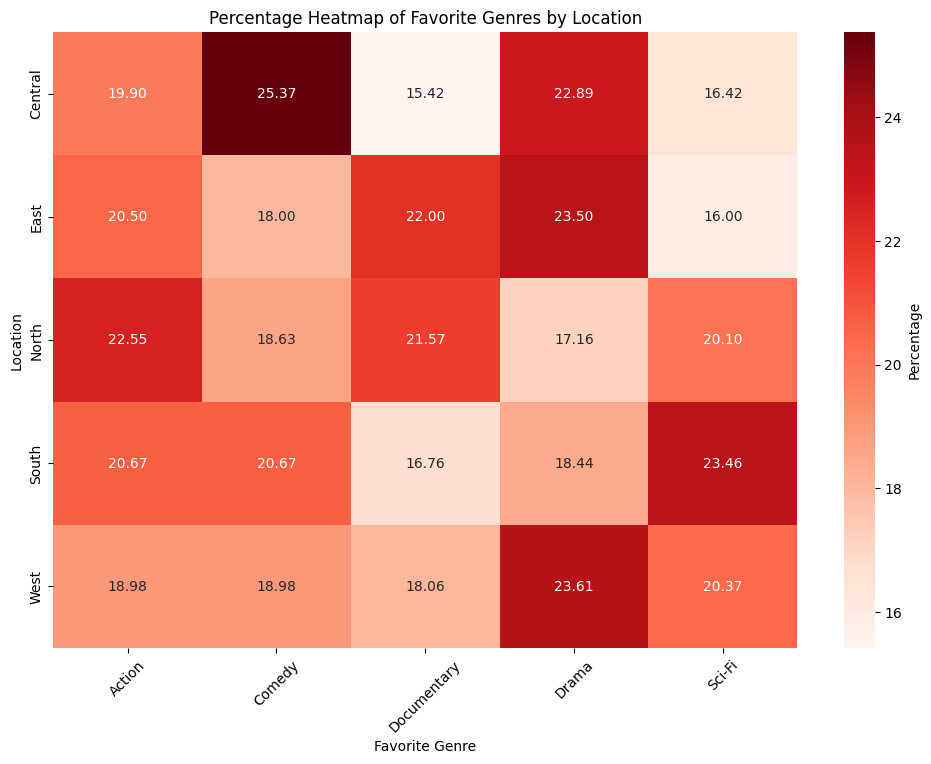

In [441]:
plt.figure(figsize=(12, 8))
sns.heatmap(location_genre_crosstab_percentage, annot=True, fmt='.2f', cmap='Reds', cbar_kws={'label': 'Percentage'})
plt.title('Percentage Heatmap of Favorite Genres by Location')
plt.xlabel('Favorite Genre')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.show()

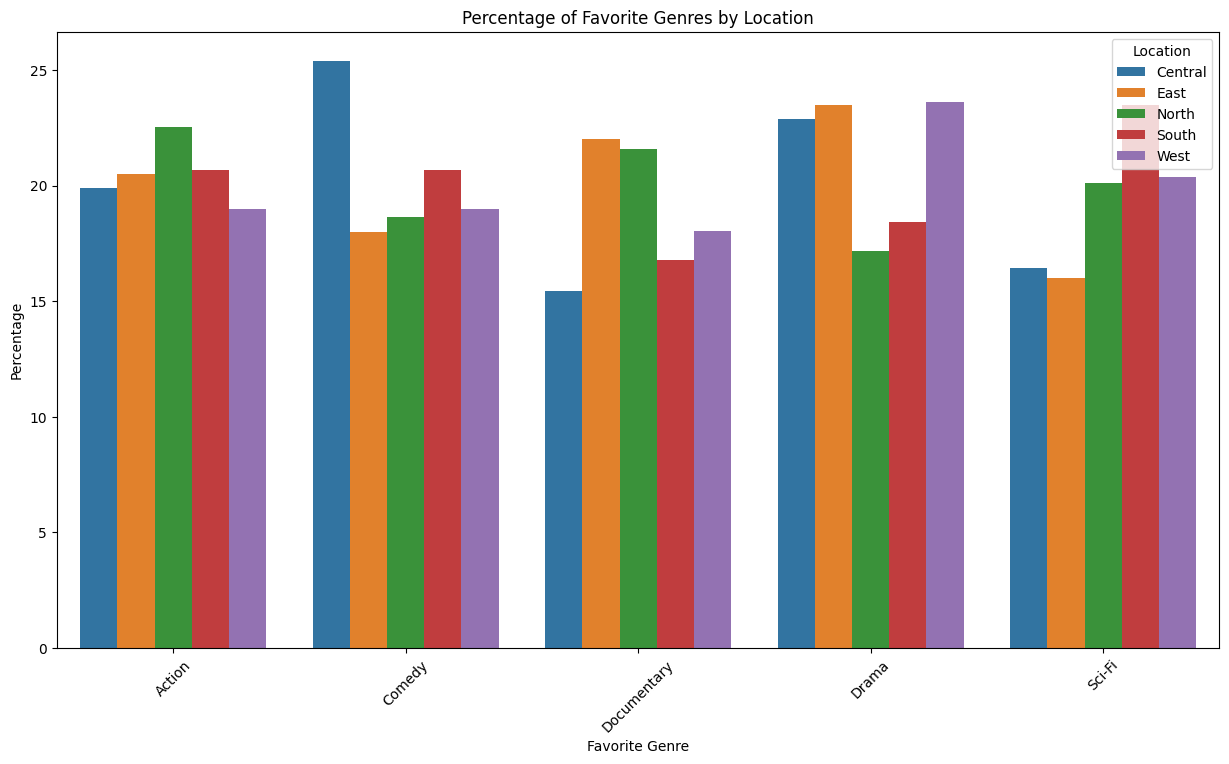

In [442]:
# Create a crosstab of favorite genres by location with percentages
location_genre_crosstab = pd.crosstab(df['Location'], df['Favorite_Genre'], normalize='index') * 100

# Reset the index to melt the dataframe for easier plotting
location_genre_crosstab = location_genre_crosstab.reset_index().melt(id_vars='Location')

# Rename columns for clarity
location_genre_crosstab.columns = ['Location', 'Favorite_Genre', 'Percentage']

# Plotting the bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x='Favorite_Genre', y='Percentage', hue='Location', data=location_genre_crosstab)
plt.title('Percentage of Favorite Genres by Location')
plt.xlabel('Favorite Genre')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.show()

##### We can push different genre based on location

# Relationship between Age and Chunred 

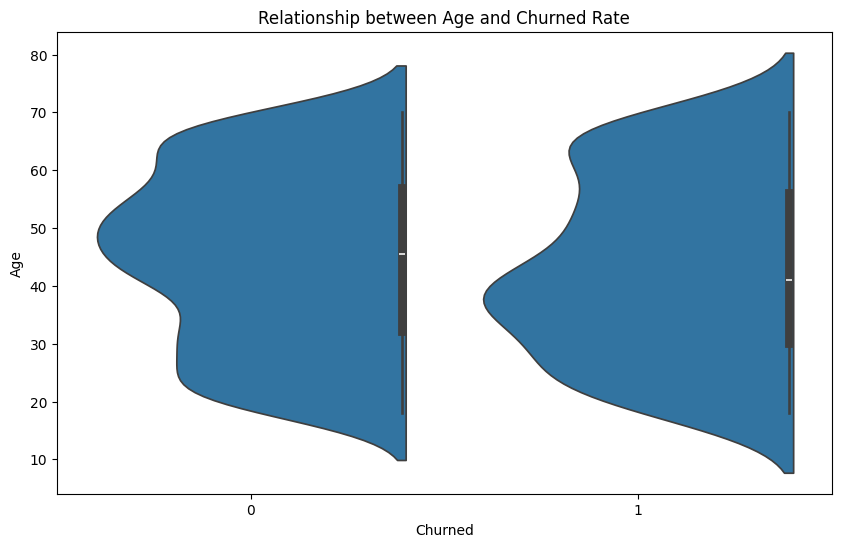

In [443]:
# Create a figure and axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Generate the violin plot
sns.violinplot(x='Churned', y='Age', data=df, split=True, ax=ax)

# Add titles and labels
plt.title('Relationship between Age and Churned Rate')
plt.xlabel('Churned')
plt.ylabel('Age')

# Display the plot
plt.show()

# Relationship between Devices_Used and Chunred 

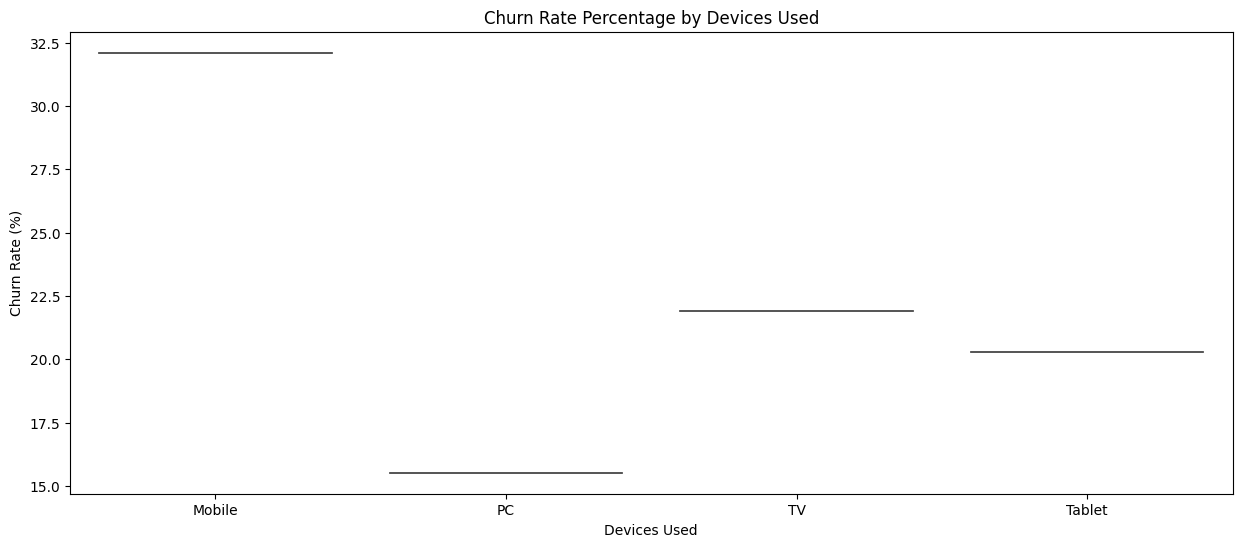

In [444]:
# Filter the dataframe to include only the rows where Churned is 1
device_churn_counts_filtered = device_churn_counts[device_churn_counts['Churned'] == 1]

# Create a figure and axis
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)

# Generate the violin plot
sns.violinplot(x='Devices_Used', y='Percentage', data=device_churn_counts_filtered, ax=ax)

# Add titles and labels
plt.title('Churn Rate Percentage by Devices Used')
plt.xlabel('Devices Used')
plt.ylabel('Churn Rate (%)')

# Display the plot
plt.show()

In [445]:
device_churn_counts_filtered

,Devices_Used,Churned,Percentage
4,Mobile,1,32.107843
5,PC,1,15.517241
6,TV,1,21.890547
7,Tablet,1,20.276498


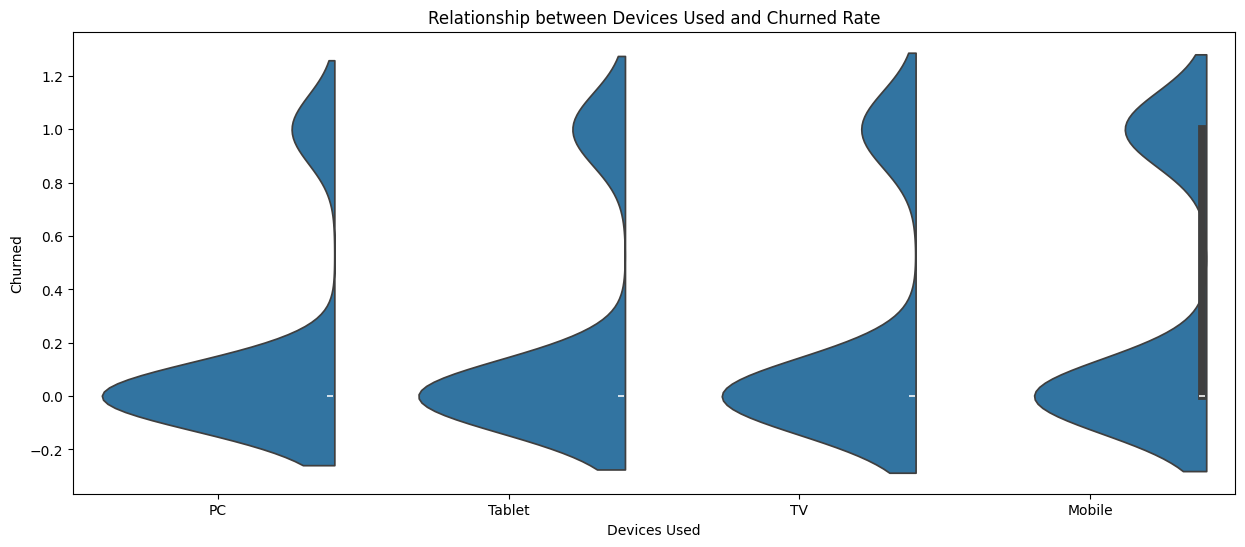

In [446]:
# Create a figure and axis
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)

# Generate the violin plot
sns.violinplot(x='Devices_Used', y='Churned', data=df, split=True, ax=ax)

# Add titles and labels
plt.title('Relationship between Devices Used and Churned Rate')
plt.xlabel('Devices Used')
plt.ylabel('Churned')

# Display the plot
plt.show()